In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense,Dropout,Activation,Input
from keras.models import Sequential,Model
from keras.callbacks import EarlyStopping, BaseLogger
from sklearn.model_selection import train_test_split
from keras import metrics
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

session = tf.Session(config=tf.ConfigProto(device_count={'gpu':0}))

# 设置session
KTF.set_session(session )

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('data/train_1.csv')
y_train = pd.read_csv('data/label_1.csv').values
df_test = pd.read_csv('data/test_1.csv')

In [3]:

model = Sequential()
input_size = len(df_train.columns)
model.add(Dense(units=256, activation='relu', input_shape=(input_size, )))
model.add(Dropout(0.7))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.1))
# 此处不能使用激活函数，因为放假是放射的
model.add(Dense(units=1,activation=None))
# 官网使用mse计算损失
model.compile(loss='mean_squared_error',optimizer='adam',metrics=[metrics.mae])
model.summary()

W1019 17:44:03.515579  2992 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1019 17:44:03.517601  2992 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1019 17:44:03.520598  2992 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1019 17:44:03.533596  2992 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                495       
__________

In [4]:
df_train = ss.fit_transform(df_train)
df_test = ss.transform(df_test)
x_tra, x_val, y_tra, y_val = train_test_split(df_train, y_train, test_size=0.2, random_state=2019)

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2)
history = model.fit(x_tra, y_tra, batch_size=64, epochs=5000, verbose=1, validation_data=(x_val, y_val), callbacks=[early_stopping])

W1019 17:44:03.848595  2992 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8000 samples, validate on 2000 samples
Epoch 1/5000
8000/8000 [==============================] - 1s 79us/step - loss: 434439331250.1760 - mean_absolute_error: 542092.0815 - val_loss: 406720757104.6400 - val_mean_absolute_error: 527382.0760
Epoch 2/5000
8000/8000 [==============================] - 0s 30us/step - loss: 265964090294.2720 - mean_absolute_error: 387396.8939 - val_loss: 74957106634.7520 - val_mean_absolute_error: 175222.3524
Epoch 3/5000
8000/8000 [==============================] - 0s 29us/step - loss: 87932371845.1200 - mean_absolute_error: 196749.6922 - val_loss: 61704243838.9760 - val_mean_absolute_error: 158031.5705
Epoch 4/5000
8000/8000 [==============================] - 0s 30us/step - loss: 80702440669.1840 - mean_absolute_error: 188084.1266 - val_loss: 57796463599.6160 - val_mean_absolute_error: 150534.7021
Epoch 5/5000
8000/8000 [==============================] - 0s 29us/step - loss: 79329843789.8240 - mean_absolute_error: 181680.0079 - val_loss: 5428199802

Epoch 42/5000
8000/8000 [==============================] - 0s 30us/step - loss: 60860559736.8320 - mean_absolute_error: 154525.0713 - val_loss: 42777789419.5200 - val_mean_absolute_error: 118262.2912
Epoch 43/5000
8000/8000 [==============================] - 0s 30us/step - loss: 60994160574.4640 - mean_absolute_error: 155607.3459 - val_loss: 41857175986.1760 - val_mean_absolute_error: 117899.5783
Epoch 44/5000
8000/8000 [==============================] - 0s 30us/step - loss: 60050844188.6720 - mean_absolute_error: 154312.2348 - val_loss: 41970508099.5840 - val_mean_absolute_error: 117232.8529
Epoch 45/5000
8000/8000 [==============================] - 0s 31us/step - loss: 59387377532.9280 - mean_absolute_error: 153761.7203 - val_loss: 42199628791.8080 - val_mean_absolute_error: 117652.9893
Epoch 46/5000
8000/8000 [==============================] - 0s 29us/step - loss: 58810397491.2000 - mean_absolute_error: 154251.6694 - val_loss: 42880386121.7280 - val_mean_absolute_error: 117671.1348


8000/8000 [==============================] - 0s 33us/step - loss: 60833374650.3680 - mean_absolute_error: 154462.4662 - val_loss: 41536907452.4160 - val_mean_absolute_error: 116757.9132
Epoch 83/5000
8000/8000 [==============================] - 0s 30us/step - loss: 59363171434.4960 - mean_absolute_error: 152374.4728 - val_loss: 41514584752.1280 - val_mean_absolute_error: 116387.1306
Epoch 84/5000
8000/8000 [==============================] - 0s 30us/step - loss: 60526872920.0640 - mean_absolute_error: 153624.5067 - val_loss: 41549141602.3040 - val_mean_absolute_error: 115995.0543
Epoch 85/5000
8000/8000 [==============================] - 0s 30us/step - loss: 56750069841.9200 - mean_absolute_error: 151615.5013 - val_loss: 41781328855.0400 - val_mean_absolute_error: 116163.7477
Epoch 86/5000
8000/8000 [==============================] - 0s 29us/step - loss: 59599644000.2560 - mean_absolute_error: 153644.6943 - val_loss: 40883649007.6160 - val_mean_absolute_error: 116192.0082
Epoch 87/5000


Epoch 123/5000
8000/8000 [==============================] - 0s 29us/step - loss: 58758985351.1680 - mean_absolute_error: 151201.7304 - val_loss: 40285247414.2720 - val_mean_absolute_error: 114747.9866
Epoch 124/5000
8000/8000 [==============================] - 0s 33us/step - loss: 59012436049.9200 - mean_absolute_error: 152708.5924 - val_loss: 40594171736.0640 - val_mean_absolute_error: 115211.3971
Epoch 125/5000
8000/8000 [==============================] - 0s 29us/step - loss: 60954862764.0320 - mean_absolute_error: 154221.5431 - val_loss: 42535012171.7760 - val_mean_absolute_error: 116897.7414
Epoch 126/5000
8000/8000 [==============================] - 0s 33us/step - loss: 58503849295.8720 - mean_absolute_error: 152007.3328 - val_loss: 40973519618.0480 - val_mean_absolute_error: 115303.5952
Epoch 127/5000
8000/8000 [==============================] - 0s 31us/step - loss: 57939388473.3440 - mean_absolute_error: 149413.2719 - val_loss: 41955250470.9120 - val_mean_absolute_error: 116061.

Epoch 164/5000
8000/8000 [==============================] - 0s 30us/step - loss: 57790366728.1920 - mean_absolute_error: 151956.8573 - val_loss: 39749028179.9680 - val_mean_absolute_error: 113636.2753
Epoch 165/5000
8000/8000 [==============================] - 0s 29us/step - loss: 57503577735.1680 - mean_absolute_error: 151631.0756 - val_loss: 40203659755.5200 - val_mean_absolute_error: 114285.5727
Epoch 166/5000
8000/8000 [==============================] - 0s 30us/step - loss: 61122595192.8320 - mean_absolute_error: 151124.6503 - val_loss: 39730562129.9200 - val_mean_absolute_error: 114173.9756
Epoch 167/5000
8000/8000 [==============================] - 0s 31us/step - loss: 57064748400.6400 - mean_absolute_error: 151616.1609 - val_loss: 39726849064.9600 - val_mean_absolute_error: 113703.3791
Epoch 168/5000
8000/8000 [==============================] - 0s 30us/step - loss: 58111764512.7680 - mean_absolute_error: 150756.7714 - val_loss: 39751243157.5040 - val_mean_absolute_error: 114023.

Epoch 205/5000
8000/8000 [==============================] - 0s 30us/step - loss: 58471730692.0960 - mean_absolute_error: 150150.3262 - val_loss: 39084046417.9200 - val_mean_absolute_error: 112929.8373
Epoch 206/5000
8000/8000 [==============================] - 0s 29us/step - loss: 56022662021.1200 - mean_absolute_error: 149519.2914 - val_loss: 38946517094.4000 - val_mean_absolute_error: 112882.4947
Epoch 207/5000
8000/8000 [==============================] - 0s 30us/step - loss: 54384095608.8320 - mean_absolute_error: 148782.9927 - val_loss: 39248593547.2640 - val_mean_absolute_error: 113027.9651
Epoch 208/5000
8000/8000 [==============================] - 0s 30us/step - loss: 55807401623.5520 - mean_absolute_error: 149660.4037 - val_loss: 39894590291.9680 - val_mean_absolute_error: 113153.4213
Epoch 209/5000
8000/8000 [==============================] - 0s 30us/step - loss: 55650390081.5360 - mean_absolute_error: 148396.4969 - val_loss: 39514578731.0080 - val_mean_absolute_error: 113295.

Epoch 246/5000
8000/8000 [==============================] - 0s 33us/step - loss: 57218623717.3760 - mean_absolute_error: 150342.6391 - val_loss: 40152855273.4720 - val_mean_absolute_error: 114072.0634
Epoch 247/5000
8000/8000 [==============================] - 0s 32us/step - loss: 56024022827.0080 - mean_absolute_error: 149894.7378 - val_loss: 39577333358.5920 - val_mean_absolute_error: 113206.5011
Epoch 248/5000
8000/8000 [==============================] - 0s 32us/step - loss: 55783039967.2320 - mean_absolute_error: 149379.7441 - val_loss: 38801310650.3680 - val_mean_absolute_error: 112729.7503
Epoch 249/5000
8000/8000 [==============================] - 0s 32us/step - loss: 56262401228.8000 - mean_absolute_error: 148252.0621 - val_loss: 39976729288.7040 - val_mean_absolute_error: 113457.7262
Epoch 250/5000
8000/8000 [==============================] - 0s 36us/step - loss: 58282131554.3040 - mean_absolute_error: 150016.0991 - val_loss: 39561957175.2960 - val_mean_absolute_error: 113079.

Epoch 287/5000
8000/8000 [==============================] - 0s 31us/step - loss: 54408461910.0160 - mean_absolute_error: 148107.6368 - val_loss: 39353102647.2960 - val_mean_absolute_error: 113094.9409
Epoch 288/5000
8000/8000 [==============================] - 0s 32us/step - loss: 54242617294.8480 - mean_absolute_error: 147494.5671 - val_loss: 37930876534.7840 - val_mean_absolute_error: 111986.7104
Epoch 289/5000
8000/8000 [==============================] - 0s 33us/step - loss: 56355476029.4400 - mean_absolute_error: 149350.3533 - val_loss: 38693201100.8000 - val_mean_absolute_error: 111749.4095
Epoch 290/5000
8000/8000 [==============================] - 0s 33us/step - loss: 55041660928.0000 - mean_absolute_error: 147554.7598 - val_loss: 38482253410.3040 - val_mean_absolute_error: 111578.5024
Epoch 291/5000
8000/8000 [==============================] - 0s 29us/step - loss: 57622637133.8240 - mean_absolute_error: 148205.5979 - val_loss: 38447378341.8880 - val_mean_absolute_error: 111667.

Epoch 328/5000
8000/8000 [==============================] - 0s 33us/step - loss: 56418689236.9920 - mean_absolute_error: 149627.5951 - val_loss: 37778244882.4320 - val_mean_absolute_error: 111750.9691
Epoch 329/5000
8000/8000 [==============================] - 0s 34us/step - loss: 55879264452.6080 - mean_absolute_error: 148300.2144 - val_loss: 37850888396.8000 - val_mean_absolute_error: 111799.1964
Epoch 330/5000
8000/8000 [==============================] - 0s 33us/step - loss: 54302287806.4640 - mean_absolute_error: 145611.3819 - val_loss: 38201181364.2240 - val_mean_absolute_error: 111887.3913
Epoch 331/5000
8000/8000 [==============================] - 0s 30us/step - loss: 57513438134.2720 - mean_absolute_error: 148499.1460 - val_loss: 37955060936.7040 - val_mean_absolute_error: 111681.1691
Epoch 332/5000
8000/8000 [==============================] - 0s 34us/step - loss: 55574614032.3840 - mean_absolute_error: 147909.7222 - val_loss: 39107188342.7840 - val_mean_absolute_error: 112213.

Epoch 369/5000
8000/8000 [==============================] - 0s 32us/step - loss: 55656984215.5520 - mean_absolute_error: 147283.4331 - val_loss: 37111262736.3840 - val_mean_absolute_error: 111405.4564
Epoch 370/5000
8000/8000 [==============================] - 0s 28us/step - loss: 54956745990.1440 - mean_absolute_error: 147047.4592 - val_loss: 37743596986.3680 - val_mean_absolute_error: 110566.5139
Epoch 371/5000
8000/8000 [==============================] - 0s 31us/step - loss: 55190829662.2080 - mean_absolute_error: 147876.9793 - val_loss: 38713295462.4000 - val_mean_absolute_error: 111690.3133
Epoch 372/5000
8000/8000 [==============================] - 0s 31us/step - loss: 56178965708.8000 - mean_absolute_error: 148729.3881 - val_loss: 38290646331.3920 - val_mean_absolute_error: 111638.2045
Epoch 373/5000
8000/8000 [==============================] - 0s 30us/step - loss: 58720625508.3520 - mean_absolute_error: 150040.6248 - val_loss: 38630997647.3600 - val_mean_absolute_error: 111881.

Epoch 410/5000
8000/8000 [==============================] - 0s 30us/step - loss: 53078485401.6000 - mean_absolute_error: 146088.4494 - val_loss: 37525250400.2560 - val_mean_absolute_error: 110834.1406
Epoch 411/5000
8000/8000 [==============================] - 0s 30us/step - loss: 55399431438.3360 - mean_absolute_error: 147391.5404 - val_loss: 38184964231.1680 - val_mean_absolute_error: 111294.2783
Epoch 412/5000
8000/8000 [==============================] - 0s 31us/step - loss: 53040751362.0480 - mean_absolute_error: 143456.8323 - val_loss: 37752392024.0640 - val_mean_absolute_error: 111015.4207
Epoch 413/5000
8000/8000 [==============================] - 0s 31us/step - loss: 54229369012.2240 - mean_absolute_error: 147034.4241 - val_loss: 38263531565.0560 - val_mean_absolute_error: 110972.8437
Epoch 414/5000
8000/8000 [==============================] - 0s 31us/step - loss: 56496271998.9760 - mean_absolute_error: 145806.9421 - val_loss: 38612717076.4800 - val_mean_absolute_error: 111261.

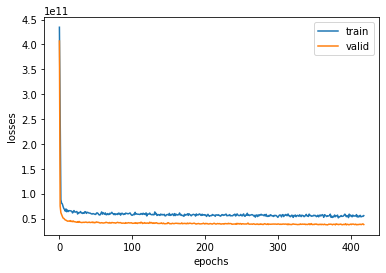

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='train')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='valid')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(loc=0)
plt.show()

In [9]:
result = pd.DataFrame({'price': model.predict(df_test).reshape(1, -1)[0]})
result.to_csv('data/result.csv', index=False, encoding='utf-8')